In [110]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [111]:
path = '../data/'
os.listdir(path)

['swes-numpy-0-M180-N90-T5-1-h',
 'swes-numpy-0-M180-N90-T5-1-u',
 'swes-numpy-0-M180-N90-T1-1-u',
 'swes-numpy-0-M180-N90-T1-1-h',
 'swes-numpy-0-M180-N90-T5-1-v',
 'swes-numpy-0-M180-N90-T1-1-v']

In [112]:
# unpickle the data
h_data = pickle.load(open(path+'swes-numpy-0-M180-N90-T1-1-h', 'rb'))
u_data = pickle.load(open(path+'swes-numpy-0-M180-N90-T1-1-u', 'rb'))
v_data = pickle.load(open(path+'swes-numpy-0-M180-N90-T1-1-v', 'rb'))

phi = h_data[3][1:-1,:]
theta = h_data[4][1:-1,:]
h = h_data[5]
u = u_data[5]
v = v_data[5]

print(phi.shape, theta.shape, h.shape)

(181, 92) (181, 92) (181, 92, 16)


(0.0, 6.283185307179586)

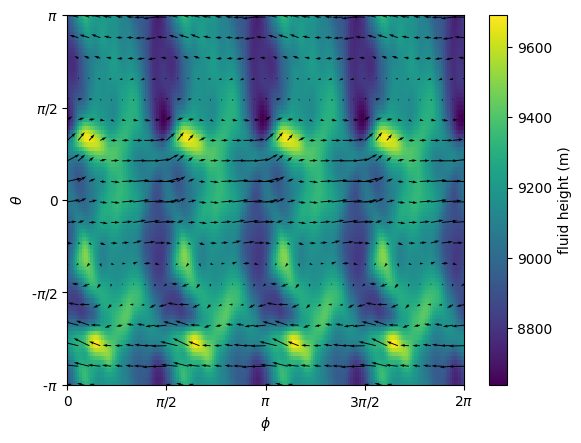

In [114]:
timestep = -2
quiver_stride = 5
plt.pcolormesh(phi, theta, h[:, :, timestep])
# color bar with label
cbar = plt.colorbar()
cbar.set_label("fluid height (m)")

plt.quiver(
    phi[::quiver_stride, ::quiver_stride],
    theta[::quiver_stride, ::quiver_stride],
    u[::quiver_stride, ::quiver_stride, timestep],
    v[::quiver_stride, ::quiver_stride, timestep],
)

plt.ylabel(r"$\theta$")
plt.yticks(
    np.linspace(-np.pi, np.pi, 5), ["-$\pi$", "-$\pi/2$", "0", "$\pi/2$", "$\pi$"]
)
plt.ylim(-np.pi, np.pi)
plt.xlabel(r"$\phi$")
plt.xticks(
    np.linspace(0, 2 * np.pi, 5), ["0", "$\pi/2$", "$\pi$", "$3\pi/2$", "$2\pi$"]
)
plt.xlim(0, 2 * np.pi)